In [1]:
from burstfit.data import BurstData
from burstfit.utils.plotter import plot_me

In [2]:
import logging
logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
# using debug mode and turning OFF debug logging for matplotlib 
logging.basicConfig(
    level=logging.DEBUG,
    format=logging_format,
)
mpl_logger = logging.getLogger("matplotlib")
mpl_logger.setLevel(logging.INFO)

# Loading the data 

In [3]:
import tempfile
from urllib.request import urlretrieve

In [4]:
temp_dir = tempfile.TemporaryDirectory()
download_path = str(temp_dir.name) + "/FRB180417.fil"
url = "https://zenodo.org/record/3905426/files/FRB180417.fil"
urlretrieve(
    url, download_path,
)
fil_file = download_path

### BurstData class can be used to read the relevant candidate data from the file. 

#### Here we need some basic information about the candidate:
#### file, dm, tcand (sec), width (samples) and snr

In [5]:
bd = BurstData(
    fp=fil_file,
    dm=475.28400,
    tcand=2.0288800,
    width=2,
    snr=16.8128,
)

2021-03-12 18:27:22,723 - __init__ -your.your - DEBUG - Reading the file(s): /tmp/tmp9tdpk_w0/FRB180417.fil
2021-03-12 18:27:22,725 - read_header -root - DEBUG - Reading b'HEADER_START' from the Filterbank file header.
2021-03-12 18:27:22,725 - read_header -root - DEBUG - Reading parameter (b'source_name', 15) from the Filterbank file header.
2021-03-12 18:27:22,726 - read_header -root - DEBUG - Reading parameter (b'data_type', 13) from the Filterbank file header.
2021-03-12 18:27:22,727 - read_header -root - DEBUG - Reading parameter (b'nchans', 10) from the Filterbank file header.
2021-03-12 18:27:22,728 - read_header -root - DEBUG - Reading parameter (b'tsamp', 9) from the Filterbank file header.
2021-03-12 18:27:22,729 - read_header -root - DEBUG - Reading parameter (b'rawdatafile', 15) from the Filterbank file header.
2021-03-12 18:27:22,730 - read_header -root - DEBUG - Reading parameter (b'src_raj', 11) from the Filterbank file header.
2021-03-12 18:27:22,730 - read_header -root

In [6]:
bd.prepare_data()

2021-03-12 18:27:22,806 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-03-12 18:27:22,808 - get_chunk -your.candidate - DEBUG - tstart is 1.4008481425250772
2021-03-12 18:27:22,809 - get_chunk -your.candidate - DEBUG - tstop is 2.6569118574749226
2021-03-12 18:27:22,809 - get_chunk -root - DEBUG - nstart_read is 1106, nsamp_read is 991,nstart is 1106, nsamp is 991
2021-03-12 18:27:22,810 - get_chunk -root - DEBUG - All the data available in the file, no need to pad. 
nstart_read(1106)>=0 and 
nstart_read(1106)+nsamp_read(991)<=nspectra(5120)
2021-03-12 18:27:22,812 - get_data -your.your - DEBUG - Reading 991 samples from sample 1106
2021-03-12 18:27:22,812 - get_data -your.your - DEBUG - time_decimation_factor: 1
2021-03-12 18:27:22,813 - get_data -your.your - DEBUG - frequency_decimation_factor: 1
2021-03-12 18:27:22,825 - mask_channels -burstfit.data - DEBUG - Masking channels.
2021-03-12 18:27:22,826 - crop_dedispersed_data -burstfit.data - INFO - Crop

Using <class 'str'>:
/tmp/tmp9tdpk_w0/FRB180417.fil

#### The above statement crops the relevant data around the candidate, normalizes it, dedisperses it at the candidate DM and applies RFI mask (if any)

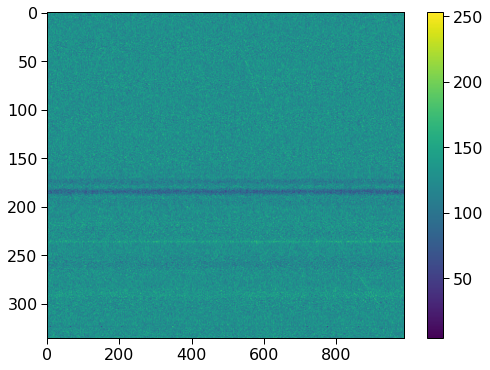

In [7]:
# larger chunk of data, not processed 
plot_me(bd.data.T)

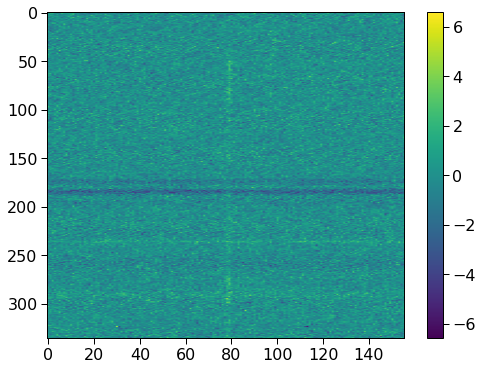

In [8]:
# after cropping and pre-processing
plot_me(bd.sgram)

#### Can also do more RFI mitigation here, and change the size of cropped data.

In [9]:
# here we are doing RFI mitigation using savgol and spectral kurtosis filters
bd = BurstData(
    fp=fil_file,
    dm=475.28400,
    tcand=2.0288800,
    width=2,
    snr=16.8128,
    spectral_kurtosis_sigma=4, 
    savgol_frequency_window=15, 
    savgol_sigma=4, 
    flag_rfi=True)

2021-03-12 18:27:23,595 - __init__ -your.your - DEBUG - Reading the file(s): /tmp/tmp9tdpk_w0/FRB180417.fil
2021-03-12 18:27:23,596 - read_header -root - DEBUG - Reading b'HEADER_START' from the Filterbank file header.
2021-03-12 18:27:23,597 - read_header -root - DEBUG - Reading parameter (b'source_name', 15) from the Filterbank file header.
2021-03-12 18:27:23,598 - read_header -root - DEBUG - Reading parameter (b'data_type', 13) from the Filterbank file header.
2021-03-12 18:27:23,599 - read_header -root - DEBUG - Reading parameter (b'nchans', 10) from the Filterbank file header.
2021-03-12 18:27:23,599 - read_header -root - DEBUG - Reading parameter (b'tsamp', 9) from the Filterbank file header.
2021-03-12 18:27:23,600 - read_header -root - DEBUG - Reading parameter (b'rawdatafile', 15) from the Filterbank file header.
2021-03-12 18:27:23,601 - read_header -root - DEBUG - Reading parameter (b'src_raj', 11) from the Filterbank file header.
2021-03-12 18:27:23,602 - read_header -root

2021-03-12 18:27:23,690 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-03-12 18:27:23,691 - get_chunk -your.candidate - DEBUG - tstart is 1.4008481425250772
2021-03-12 18:27:23,692 - get_chunk -your.candidate - DEBUG - tstop is 2.6569118574749226
2021-03-12 18:27:23,693 - get_chunk -root - DEBUG - nstart_read is 1106, nsamp_read is 991,nstart is 1106, nsamp is 991
2021-03-12 18:27:23,694 - get_chunk -root - DEBUG - All the data available in the file, no need to pad. 
nstart_read(1106)>=0 and 
nstart_read(1106)+nsamp_read(991)<=nspectra(5120)
2021-03-12 18:27:23,695 - get_data -your.your - DEBUG - Reading 991 samples from sample 1106
2021-03-12 18:27:23,695 - get_data -your.your - DEBUG - time_decimation_factor: 1
2021-03-12 18:27:23,696 - get_data -your.your - DEBUG - frequency_decimation_factor: 1
2021-03-12 18:27:23,701 - sk_sg_filter -your.utils.rfi - DEBUG - Applying spectral kurtosis filter with sigma=4
/home/kshitij/anaconda3/envs/grbfrb/lib/python3

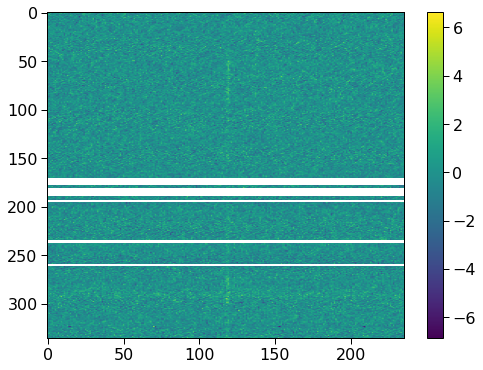

In [10]:
# let's give an input time window size of 0.3sec
bd.prepare_data(time_window=0.3)
plot_me(bd.sgram)

#### White rows represent the frequency channels that have been flagged by the RFI mitigation algorithms 

2021-03-12 18:27:24,037 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-03-12 18:27:24,038 - get_chunk -your.candidate - DEBUG - tstart is 1.4008481425250772
2021-03-12 18:27:24,038 - get_chunk -your.candidate - DEBUG - tstop is 2.6569118574749226
2021-03-12 18:27:24,039 - get_chunk -root - DEBUG - nstart_read is 1106, nsamp_read is 991,nstart is 1106, nsamp is 991
2021-03-12 18:27:24,039 - get_chunk -root - DEBUG - All the data available in the file, no need to pad. 
nstart_read(1106)>=0 and 
nstart_read(1106)+nsamp_read(991)<=nspectra(5120)
2021-03-12 18:27:24,039 - get_data -your.your - DEBUG - Reading 991 samples from sample 1106
2021-03-12 18:27:24,040 - get_data -your.your - DEBUG - time_decimation_factor: 1
2021-03-12 18:27:24,040 - get_data -your.your - DEBUG - frequency_decimation_factor: 1
2021-03-12 18:27:24,042 - sk_sg_filter -your.utils.rfi - DEBUG - Applying spectral kurtosis filter with sigma=4
/home/kshitij/anaconda3/envs/grbfrb/lib/python3

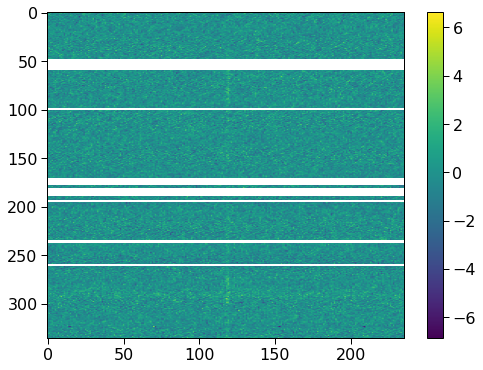

In [11]:
# We can even give channels to mask as input. 
# Let's mask all channels from 50 to 60 and mask channel number 100. 
# That can be done by giving the channel range as a tuple and individual 
# channel number in a list.
mask = [(50, 60), 100]
bd.prepare_data(time_window=0.3, mask_chans=mask)
plot_me(bd.sgram)

#### Looks good! 

#### Now the data is ready for burst fitting using BurstFit. 